<a href="https://colab.research.google.com/github/dilp90/Artificial_Intelligence_FIME/blob/main/UnsupervisedLearning/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset (Heart Disease UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
           "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, names=columns, na_values="?")  # Handle missing values

In [ ]:
# Preprocessing
df.dropna(inplace=True)  # Remove missing values

# Drop target variable (unsupervised learning)
df_unsupervised = df.drop(columns=["target"])

# Convert categorical columns to numeric if needed
df_unsupervised = df_unsupervised.apply(pd.to_numeric)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unsupervised)

# Perform PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

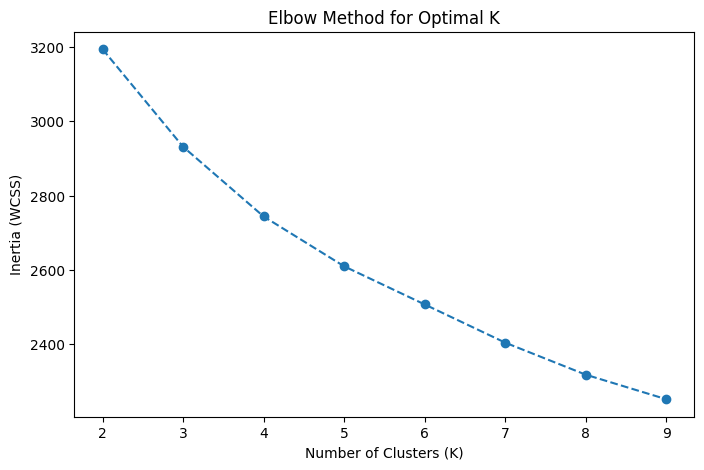

In [ ]:
# Select and training of the model

# Determine optimal K using the Elbow Method
inertia = []
K_range = range(2, 10)  # Testing different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train K-Means with the optimal K (Assume K=3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

Silhouette Score for K=3: 0.1298


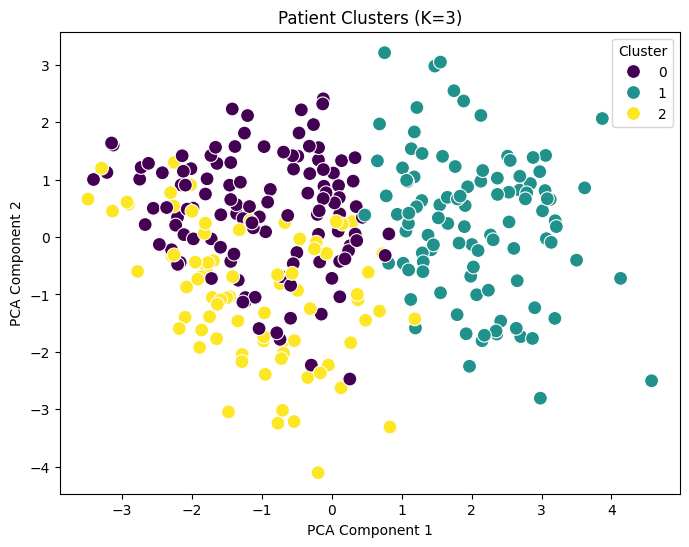

               age       sex        cp    trestbps        chol       fbs  \
Cluster                                                                    
0        50.965812  1.000000  2.743590  129.478632  235.179487  0.136752   
1        58.198020  0.831683  3.782178  135.772277  252.752475  0.198020   
2        55.164557  0.000000  2.974684  129.759494  258.468354  0.088608   

          restecg     thalach     exang   oldpeak     slope        ca  \
Cluster                                                                 
0        0.854701  162.940171  0.119658  0.600855  1.350427  0.384615   
1        1.257426  130.039604  0.702970  1.981188  2.019802  1.277228   
2        0.873418  154.848101  0.151899  0.545570  1.443038  0.341772   

             thal    target  
Cluster                      
0        4.572650  0.461538  
1        6.188119  2.148515  
2        3.101266  0.126582  


In [ ]:
# Evaluate Clustering using Silhouette Score
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

# Add cluster labels to the dataset
df["Cluster"] = clusters

# Visualize clusters with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette="viridis", s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Patient Clusters (K={optimal_k})")
plt.legend(title="Cluster")
plt.show()

# Display mean characteristics of each cluster
print(df.groupby("Cluster").mean())